In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

## Loading Data

In [2]:
df=pd.read_csv('standardscaler_.csv')

In [3]:
df.head()

,Experience_Years,Age,Education_Level,Hours_Per_Week,Salary
0,5.99,34.63,3,41.12,87638.54
1,4.72,39.55,4,46.82,84956.80
2,6.30,23.01,1,40.63,73501.52
3,8.05,32.81,4,37.85,100707.27
4,4.53,26.75,3,40.61,80094.46


In [4]:
df.isnull().sum()

Experience_Years    0
Age                 0
Education_Level     0
Hours_Per_Week      0
Salary              0
dtype: int64

In [5]:
df.duplicated().any()

False

In [6]:
df.columns

Index(['Experience_Years', 'Age', 'Education_Level', 'Hours_Per_Week',
       'Salary'],
      dtype='object')

In [7]:
x= df.drop('Salary', axis=1)
y=df['Salary']

In [8]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

## Model Creation

In [9]:
model=LinearRegression()

In [10]:
model.fit(xtrain,ytrain)

LinearRegression()

In [11]:
ypred=model.predict(xtest)

## Evaluation

In [12]:
model.score(xtest,ytest)

0.3945010676614117

In [13]:
r2_score(ytest,ypred)

0.3945010676614117

In [14]:
mean_squared_error(ytest,ypred)

117965051.84306179

In [15]:
df.columns

Index(['Experience_Years', 'Age', 'Education_Level', 'Hours_Per_Week',
       'Salary'],
      dtype='object')

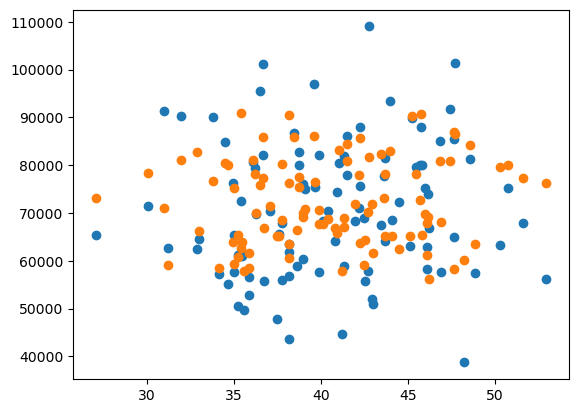

In [16]:
plt.scatter(xtest['Hours_Per_Week'],ytest)
plt.scatter(xtest['Hours_Per_Week'],ypred)

# Using standard scaler

In [17]:
scaler=StandardScaler()
xtrainscaled=scaler.fit_transform(xtrain)
xtestscated=scaler.transform(xtest)

In [18]:
model=LinearRegression()

In [19]:
model.fit(xtrainscaled,ytrain)

LinearRegression()

In [20]:
model.score(xtestscated,ytest)

0.3945010676614117

In [21]:
ypred=model.predict(xtestscated)

# Using polynomial

In [35]:
poly=PolynomialFeatures(degree=4)
xpoly=poly.fit_transform(xtrainscaled)

In [36]:
model=LinearRegression()

In [37]:
model.fit(xpoly,ytrain)

LinearRegression()

In [38]:
xtestpoly=poly.transform(xtestscated)

In [39]:
ypred=model.predict(xtestpoly)

In [40]:
r2_score(ytest,ypred)

-0.12217101455944257

#### Conclusion:   I worked with a dataset that has non-linear data.To handle this I used PolynomialFeatures to convert the data into a form that linear model can understand. I used also standard scaler for scale the data , which help to improve model performance.

#### But,For Insufficient or noisy data this model didn't perform well.